# Capstone Project 1- Heart Failure Prediction

General introduction and defining the problem-  Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


# Importing the essential libraries

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_rows",None) 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import warnings
warnings.simplefilter('ignore')

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('heart_failure_clinical_records1.csv')
df.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

# Dataset Description

In [3]:
# Attribute Description:
# Age: Age of the patient in years
# Sex: Gender of the patient (M: Male, F: Female)
# ChestPain: Type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
# RestingBP: Resting blood pressure in mm Hg
# Cholesterol: Serum cholesterol level in mg/dL
# FastingBS: Fasting blood sugar level in mg/dL
# RestingECG: Result of resting electrocardiogram (Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy)
# MaxHR: Maximum heart rate achieved
# ExerciseAngina: Whether the patient experienced exercise-induced angina (Y: Yes, N: No)
# Oldpeak: ST depression induced by exercise relative to rest
# ST_Slope: Slope of the peak exercise ST segment (Up: Upsloping, Flat: Flat, Down: Downsloping)
# HeartDisease: Output class indicating the presence or absence of heart disease (1: heart disease, 0: normal)


In [4]:
 # info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see that in DataFrame following columns :

Age: Integer values representing the age of patients.

Sex: Categorical values indicating the gender of the patients.

ChestPainType: Categorical values representing the type of chest pain.

RestingBP: Integer values representing resting blood pressure.

Cholesterol: Integer values representing serum cholesterol level.

FastingBS: Integer values indicating fasting blood sugar level.

RestingECG: Categorical values representing results of resting electrocardiogram.

MaxHR: Integer values representing maximum heart rate achieved.

ExerciseAngina: Categorical values indicating whether the patient experienced exercise-induced angina.

Oldpeak: Float values representing ST depression induced by exercise relative to rest.

ST_Slope: Categorical values representing the slope of the peak exercise ST segment.

HeartDisease: Integer values indicating the presence (1) or absence (0) of heart disease.

In [5]:
df.shape

(918, 12)

In [6]:
df.size

11016

In [7]:
# Definig a function for the description of dataset
def dataset_description(df):
    # Number of columns in the DataFrame
    num_columns = len(df.columns)
    print('No. of Columns in DataFrame:', num_columns)
    
    # Column attribute names
    print('\nColumn Attribute Names:', df.columns.tolist())
    
    # Numerical columns
    numerical_columns = df.describe().columns.tolist()
    print('\nNo. of Numerical Columns in DataFrame:', len(numerical_columns))
    print('\nNumerical Column Names:', numerical_columns)
    
    # Categorical columns
    categorical_columns = [col for col in df.columns if col not in numerical_columns]
    print('\nNo. of Categorical Columns in DataFrame:', len(categorical_columns))
    print('\nCategorical Column Names:', categorical_columns)

# Calling the function with DataFrame
dataset_description(df)


No. of Columns in DataFrame: 12

Column Attribute Names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Columns in DataFrame: 7

Numerical Column Names: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Columns in DataFrame: 5

Categorical Column Names: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [8]:
#checking the null values present in the DataFrame
df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

It appears that there are no null values present in any of the columns of DataFrame.

In [9]:
#unique values found in the DataFrame of each column
df.nunique() 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Here's a summary of the unique values for each column:

Age: 50 unique values

Sex: 2 unique values

ChestPainType: 4 unique values

RestingBP: 67 unique values

Cholesterol: 222 unique values

FastingBS: 2 unique values

RestingECG: 3 unique values

MaxHR: 119 unique values

ExerciseAngina: 2 unique values

Oldpeak: 53 unique values

ST_Slope: 3 unique values

HeartDisease: 2 unique values

In [10]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

The output is the summary of statistics for the numerical columns of DataFrame:

Count: Number of non-null values in each column.

Mean: Average value of the column.

Std: Standard deviation, which measures the dispersion or spread of values around the mean.

Min: Minimum value observed in the column.
25%: 25th percentile, also known as the first quartile (Q1), which represents the value below which 25% of the observations fall.

50%: 50th percentile, also known as the median or second quartile (Q2), which represents the middle value of the column.

75%: 75th percentile, also known as the third quartile (Q3), which represents the value below which 75% of the observations fall.

Max: Maximum value observed in the column.

In [11]:
df.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

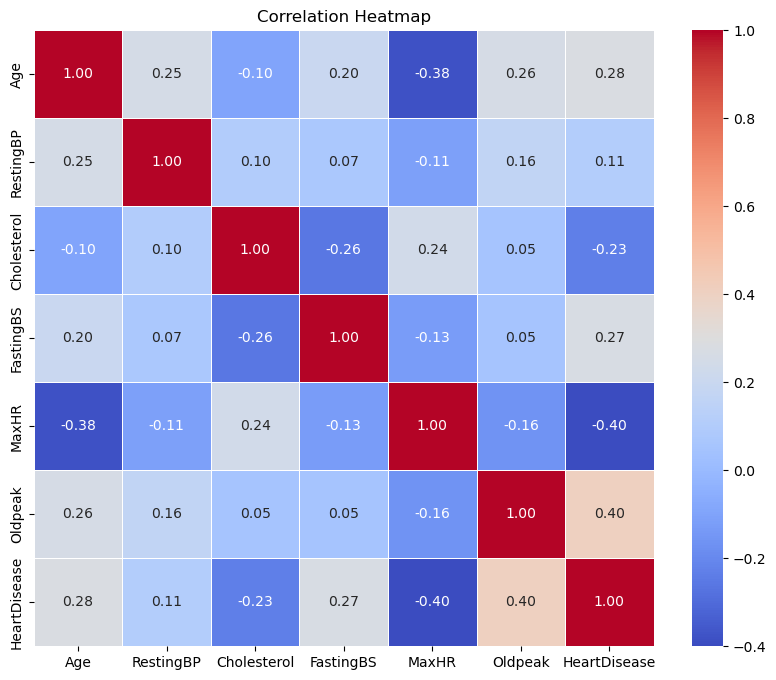

In [12]:
# Plotting  correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


The output represents the correlation between each pair of columns in DataFrame. Each cell contains the correlation coefficient between the corresponding pair of columns. Values close to 1 or -1 indicate strong positive or negative correlations, respectively, while values close to 0 indicate weak or no correlation.

In [13]:
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

The output you received represents the skewness for each numerical column in your DataFrame. Here's a breakdown of the skewness values:

Age: Skewness of approximately -0.196, indicating a slightly left-skewed distribution.

RestingBP: Skewness of approximately 0.180, indicating a slightly right-skewed distribution.

Cholesterol: Skewness of approximately -0.610, indicating a moderately left-skewed distribution.

FastingBS: Skewness of approximately 1.264, indicating a moderately right-skewed distribution.

MaxHR: Skewness of approximately -0.144, indicating a slightly left-skewed distribution.

Oldpeak: Skewness of approximately 1.023, indicating a moderately right-skewed distribution.

HeartDisease: Skewness of approximately -0.215, indicating a slightly left-skewed distribution.

# Data Visualization

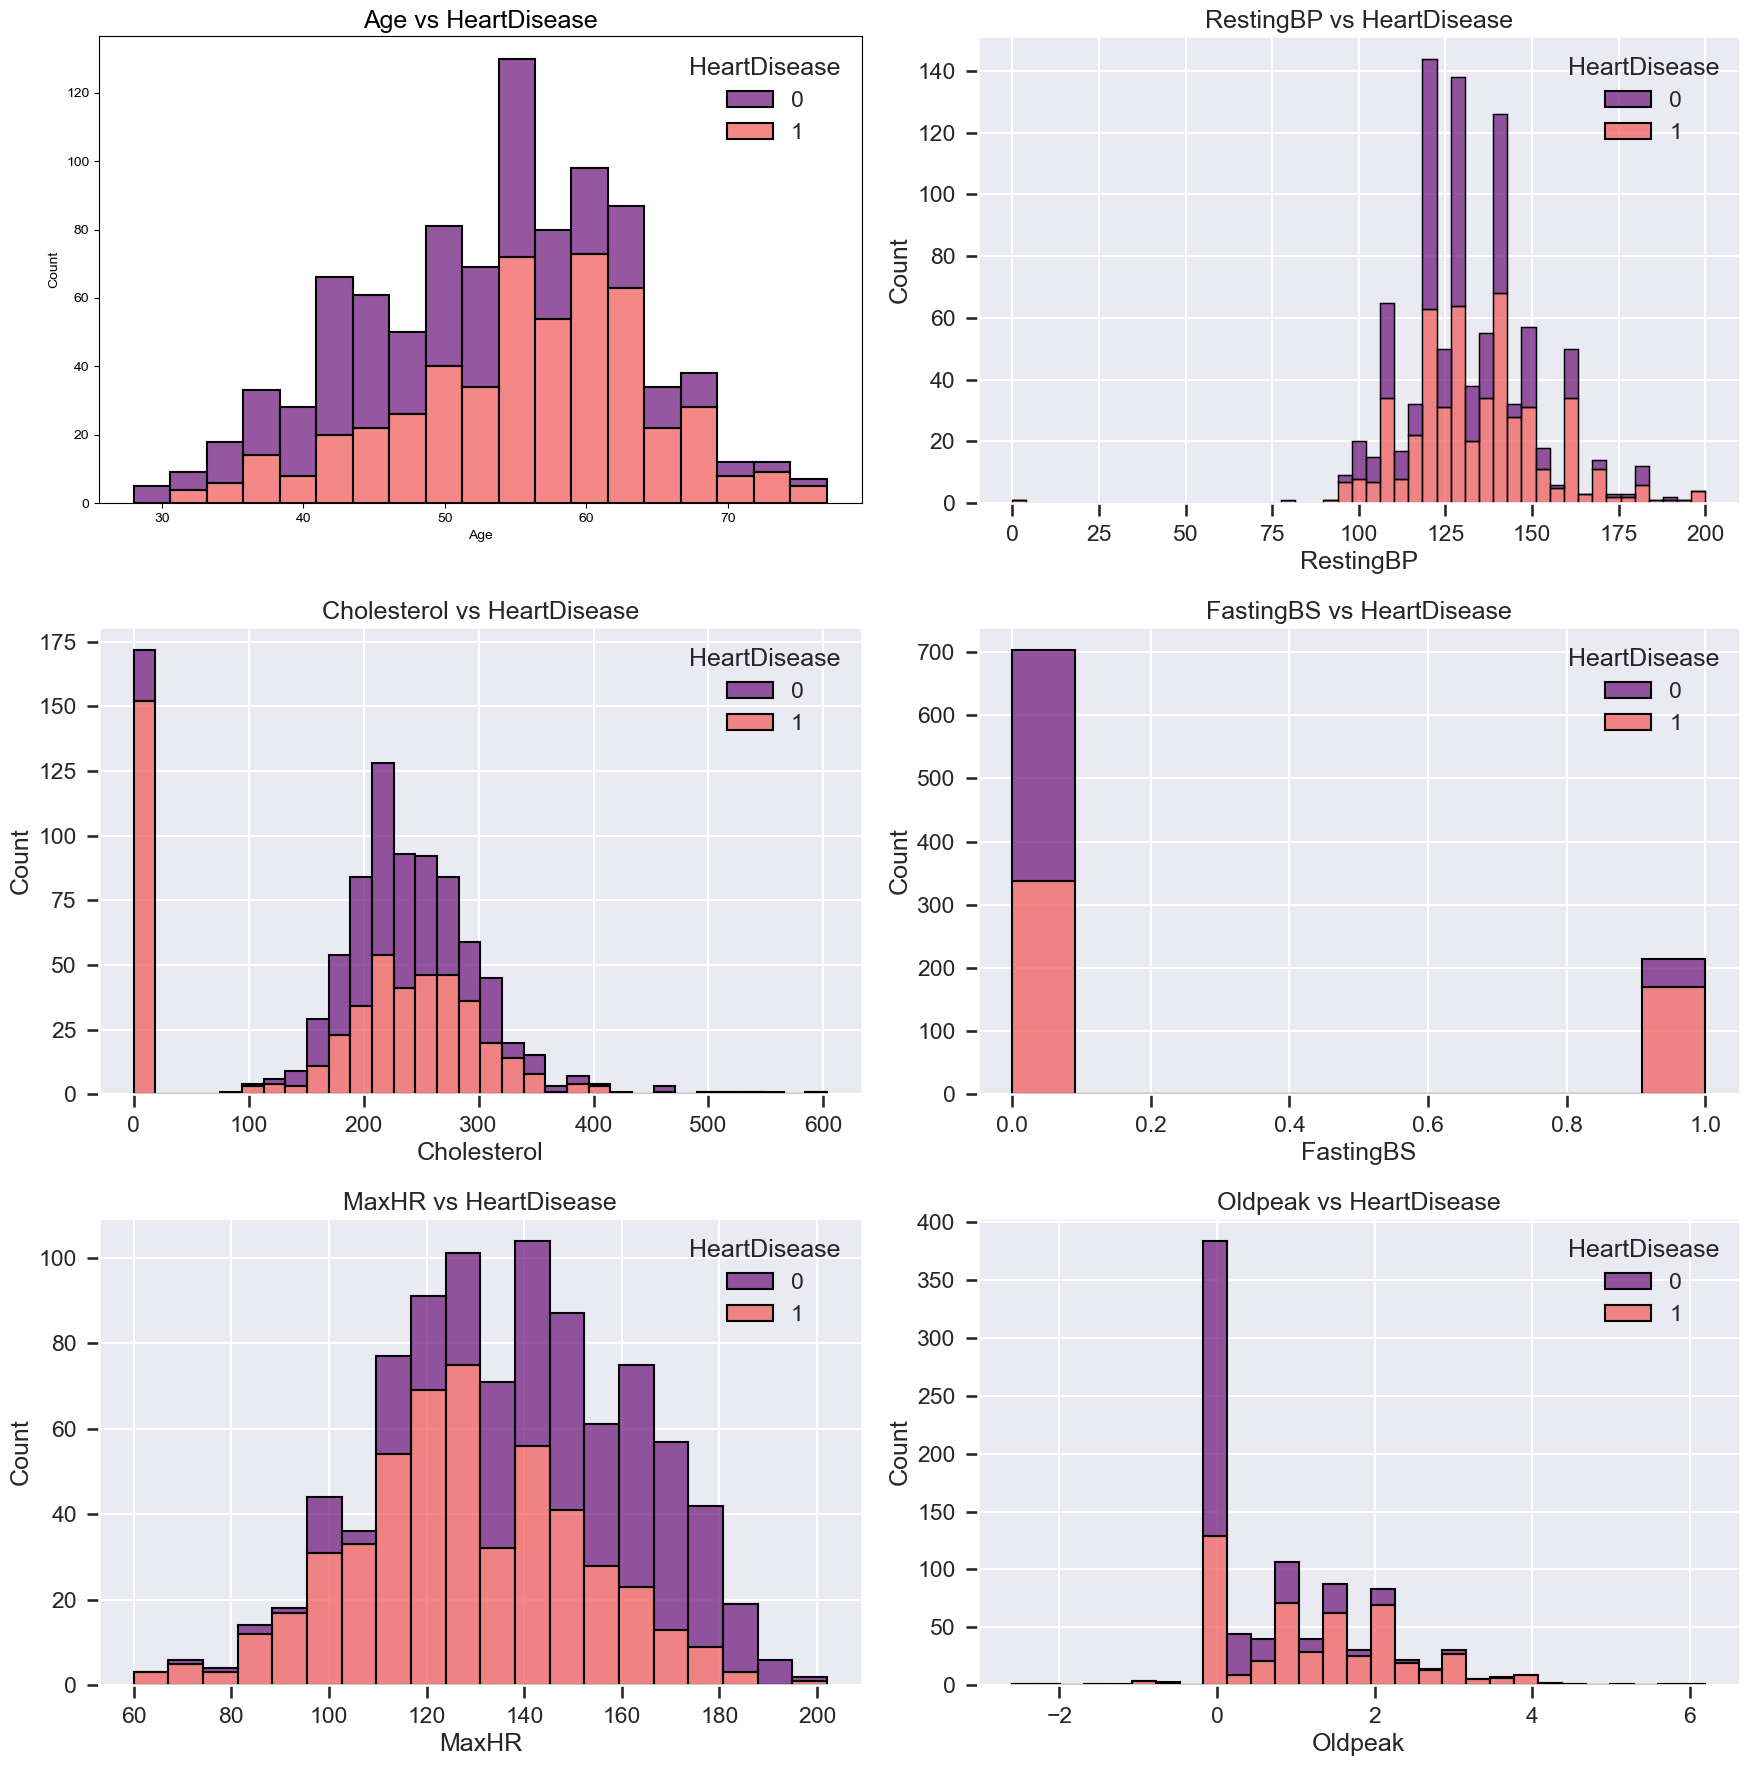

In [14]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

This histograms compare different health metrics with the presence or absence of heart disease. Each plot represents a different variable and how it correlates with instances of heart disease (denoted as '1' for presence and '0' for absence). Let's break down each plot:

1. **Age vs Heart Disease**: This plot shows that younger individuals (approximately age 30 to 50) more commonly do not have heart disease (purple bars). The prevalence of heart disease (red bars) increases with age, particularly noticeable from age 50 onwards.

2. **Resting Blood Pressure (RestingBP) vs Heart Disease**: Higher resting blood pressure values appear slightly more frequently associated with heart disease. The distribution is fairly similar across different blood pressure levels, but there is a slight increase in heart disease cases as blood pressure increases, especially beyond 120 mmHg.

3. **Cholesterol vs Heart Disease**: Cholesterol levels show a broad distribution with respect to heart disease. Both groups (with and without heart disease) have a wide range of cholesterol levels, but there's a noticeable cluster around 200-300 mg/dL where the presence of heart disease is more prevalent.

4. **Fasting Blood Sugar (FastingBS) vs Heart Disease**: This plot shows that most individuals, regardless of their fasting blood sugar being below or above 0.8 (likely denoting 120 mg/dL as a threshold), do not have heart disease. However, those with higher fasting blood sugar (>0.8) show a notable increase in the incidence of heart disease.

5. **Maximum Heart Rate (MaxHR) vs Heart Disease**: Individuals with higher maximum heart rates generally do not have heart disease, as indicated by the higher counts of non-heart disease cases across higher heart rate values. Lower maximum heart rates seem to have a more pronounced association with heart disease.

6. **Oldpeak vs Heart Disease**: Oldpeak, likely a measure related to the depression of the ST segment in an ECG, shows that lower values (near 0) are common among individuals both with and without heart disease. However, higher values (especially around 2) are predominantly associated with heart disease.

Overall, these plots provide a visual correlation between certain physiological and health metrics with the presence of heart disease. Each metric offers some insight into how it might influence or relate to the risk of developing heart disease.

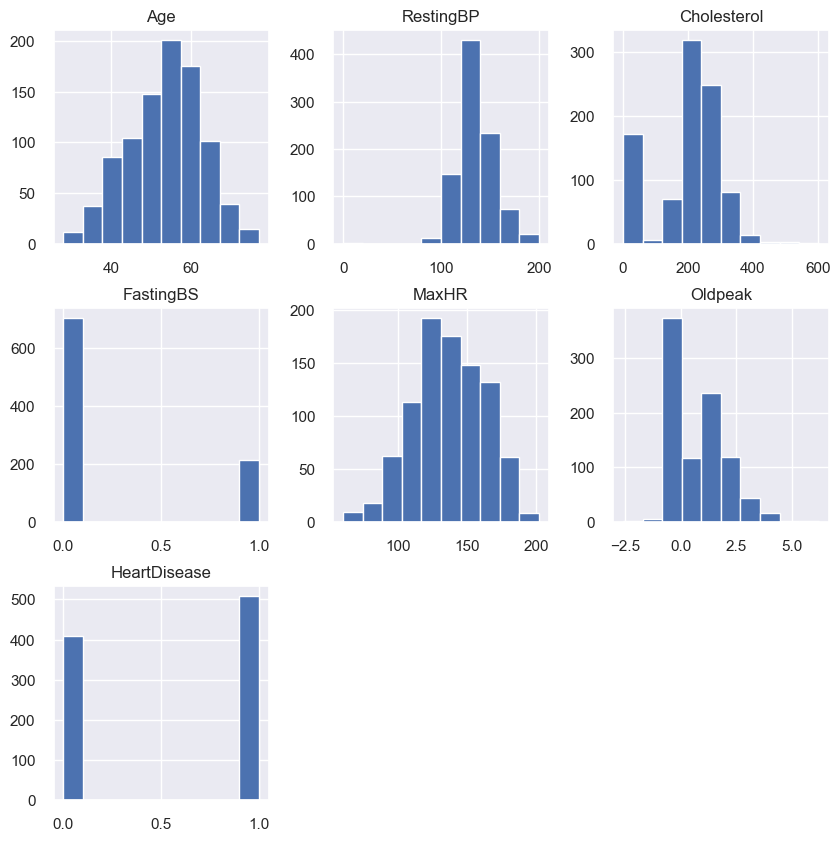

In [16]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.set()
df.hist(figsize=(10,10))
plt.show()

These histograms representing the distribution of different variables related to heart health. Here is an interpretation of each histogram:

Age:

The distribution of age is approximately normal, with most individuals falling between 40 and 60 years old. The peak is around 55 years.

RestingBP (Resting Blood Pressure):

The resting blood pressure values are mostly concentrated around 120 mmHg, with a few outliers on both lower and higher ends.

Cholesterol:

Cholesterol levels show a wide range, with a peak around 200 mg/dL. There are several individuals with cholesterol levels above 300 mg/dL.

FastingBS (Fasting Blood Sugar):

The majority of individuals have a fasting blood sugar level of 0 (presumably indicating normal levels), while a smaller group has a level of 1 (indicating high fasting blood sugar).

MaxHR (Maximum Heart Rate Achieved):

The maximum heart rate achieved is normally distributed, with most values between 120 and 170 bpm. The peak is around 140 bpm.

Oldpeak:

Oldpeak values, which measure ST depression induced by exercise relative to rest, are mostly concentrated around 0, with a few higher values up to 5.

HeartDisease:

The distribution of heart disease presence is binary, with a roughly equal number of individuals with (1) and without (0) heart disease.

These histograms provide a visual summary of the data, showing the central tendency, spread, and distribution shape for each variable.

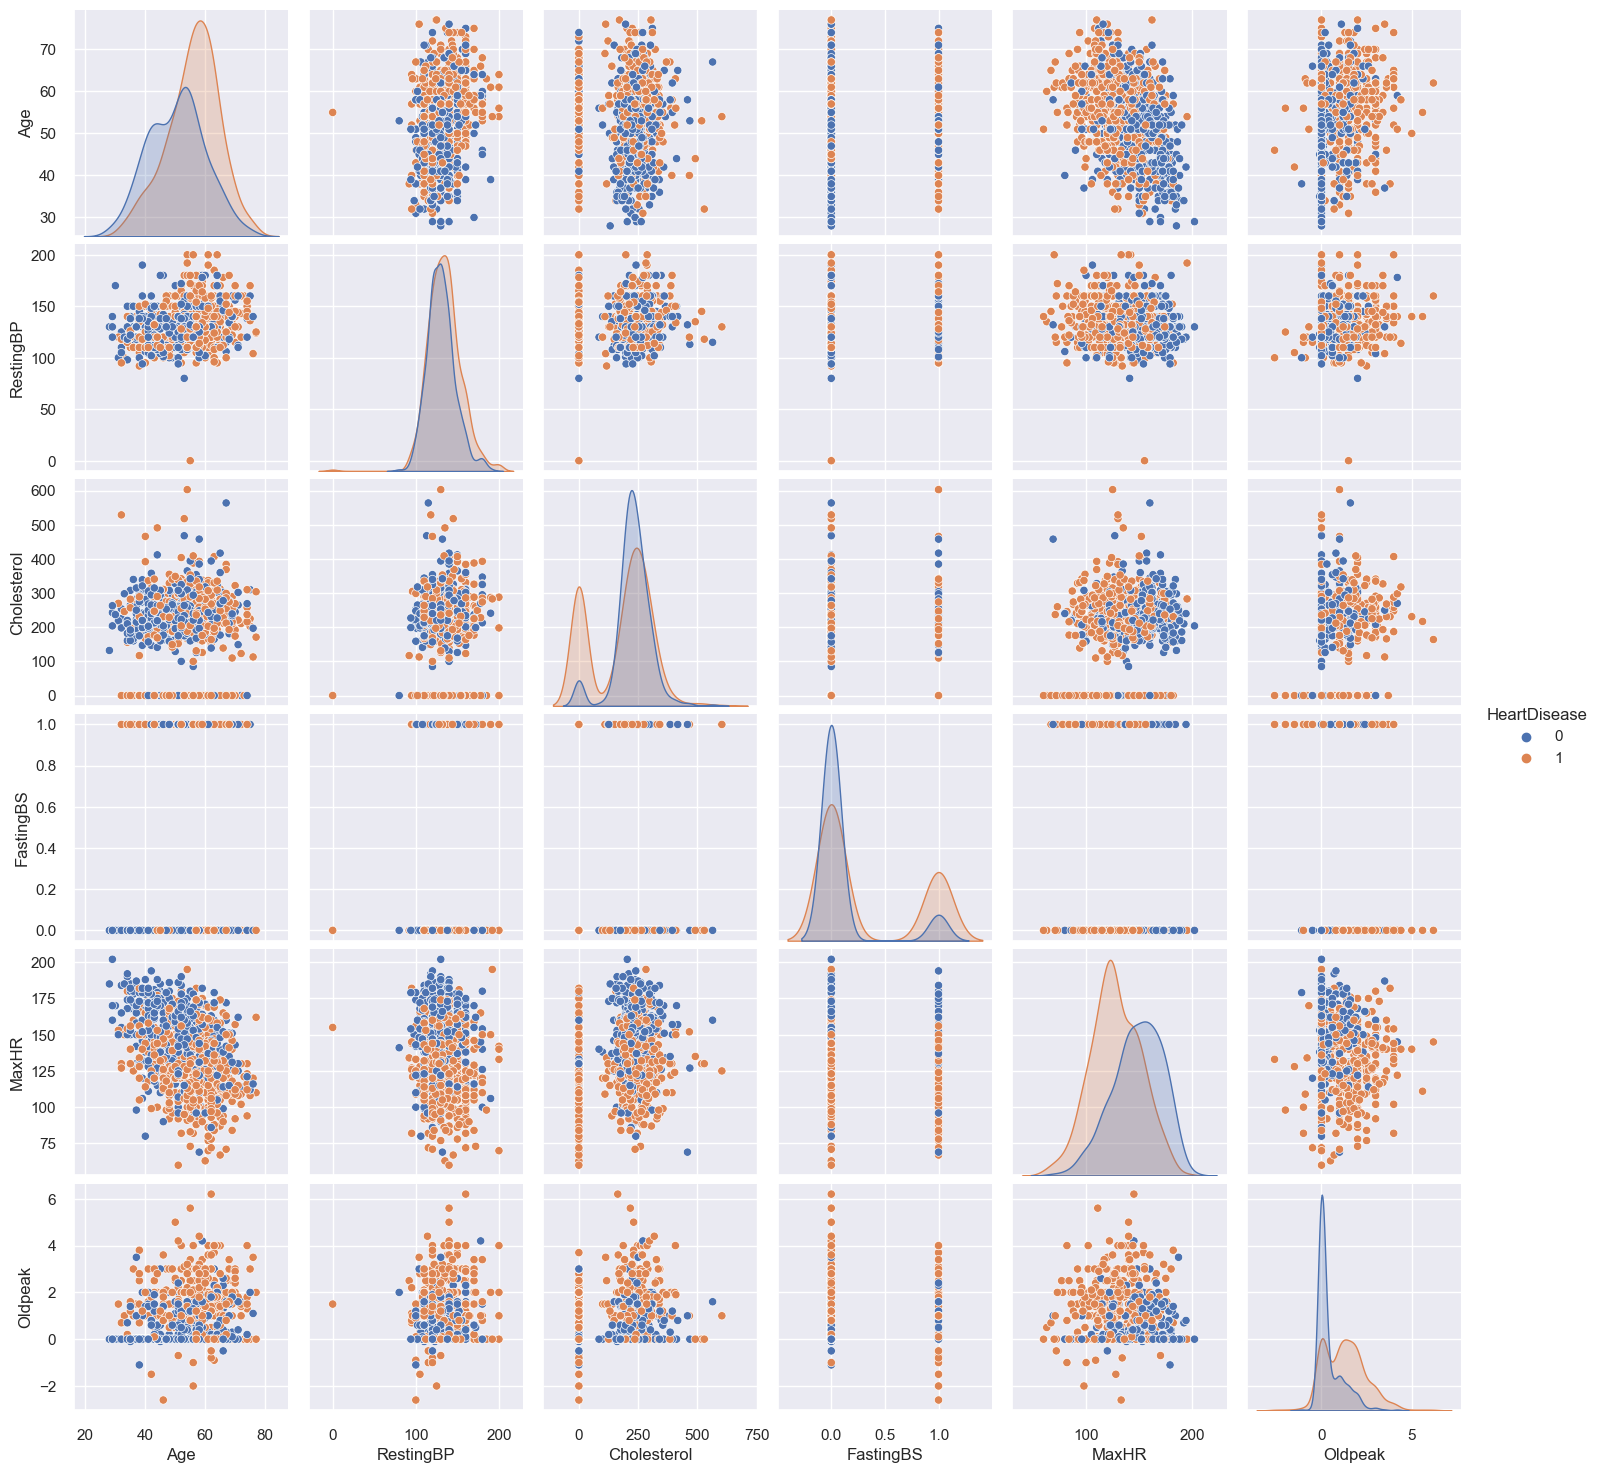

In [16]:
sns.pairplot(df,hue='HeartDisease')

The pairplot provides a comprehensive visualization of the relationships between multiple variables in the dataset, with the data points colored by the presence (1) or absence (0) of heart disease. Here is an interpretation of the pairplot:

Age:

The distribution of age shows that individuals with heart disease (orange) tend to be older compared to those without heart disease (blue).
There is no clear linear relationship between age and other variables, but older individuals seem to have a higher incidence of heart disease.

RestingBP (Resting Blood Pressure):

Resting blood pressure does not show a strong correlation with other variables.
Both groups (with and without heart disease) have a similar distribution of resting blood pressure.

Cholesterol:

Cholesterol levels are widely spread for both groups, with no clear distinction between those with and without heart disease.
There is no strong correlation between cholesterol and other variables.

FastingBS (Fasting Blood Sugar):

Fasting blood sugar is binary (0 or 1). Individuals with a fasting blood sugar level of 1 (high) are more likely to have heart disease.

There is no clear relationship between fasting blood sugar and other continuous variables.

MaxHR (Maximum Heart Rate Achieved):

Individuals with heart disease tend to have lower maximum heart rates compared to those without heart disease.
There is a noticeable separation in the distribution of maximum heart rate between the two groups.

Oldpeak:

Oldpeak values (ST depression) are higher in individuals with heart disease.
There is a clear distinction in the distribution of oldpeak values between the two groups.

HeartDisease:

The pairplot shows the distribution of heart disease presence (1) and absence (0) across all variables.
The color coding helps to identify patterns and relationships between heart disease and other variables.

Scatter Plots:

The scatter plots show the pairwise relationships between variables. For example:

Age vs. MaxHR: Older individuals with heart disease tend to have lower maximum heart rates.

Cholesterol vs. Age: There is no clear pattern, indicating that cholesterol levels are not strongly related to age.

Oldpeak vs. MaxHR: Higher oldpeak values are associated with lower maximum heart rates, especially in individuals with heart 
disease.

Density Plots:

The diagonal plots show the distribution of each variable, with density plots for continuous variables.
These plots highlight the differences in distributions between individuals with and without heart disease.

Overall, the pairplot reveals some key patterns:

Older age, lower maximum heart rate, higher oldpeak values, and higher fasting blood sugar levels are associated with a higher likelihood of heart disease.

Resting blood pressure and cholesterol do not show strong relationships with heart disease in this visualization.




In [18]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1


Age  ChestPainType   RestingBP  Cholesterol  FastingBS  RestingECG  \
Sex                                                                             
F    52.492228            193  132.212435   241.196891         26         193   
M    53.782069            725  132.445517   187.513103        188         725   

          MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
Sex                                                                
F    146.139896             193  0.668912       193            50  
M    134.325517             725  0.945517       725           458

Age: Mean is appropriate to understand the average age.

ChestPainType: Count is appropriate to understand the frequency of each type of chest pain.

RestingBP: Mean is appropriate to understand the average resting blood pressure.

Cholesterol: Mean is appropriate to understand the average cholesterol level.

FastingBS: Sum is appropriate if you want to count how many people have a fasting blood sugar > 120 mg/dl.

RestingECG: Count is appropriate to understand the frequency of each type of ECG result.

MaxHR: Mean is appropriate to understand the average maximum heart rate.

ExerciseAngina: Count is appropriate to understand the frequency of exercise-induced angina.

Oldpeak: Mean is appropriate to understand the average ST depression induced by exercise.

ST_Slope: Count is appropriate to understand the frequency of each type of ST slope.

HeartDisease: Sum is appropriate if you want to count how many people have heart disease.


#### Using the same aggregation function for all variables would not be meaningful because the nature of these variables is different. The average age is same for both male and female.

In [19]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

# Data Preprocessing

In [20]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [21]:
outliers_graph(df['Age'])

Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [22]:
outliers_graph(df['RestingBP'])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26


In [23]:
df=df[df.RestingBP>=90]
len(df)

916

In [24]:
outliers_graph(df['Cholesterol'])

Q25:  174.75
Q75:  267.0
Inter Quartile Range:  92.25
Outliers lie before 36.375 and beyond 405.375
Number of Rows with Left Extreme Outliers: 170
Number of Rows with Right Extreme Outliers: 12


In [25]:
df=df[df.Cholesterol<=450]  #due more value in the right extreme outlier and '0' cholesterol level in dataset
len(df)

908

In [26]:
outliers_graph(df['FastingBS'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 211


In [27]:
outliers_graph(df['MaxHR'])

Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0


In [28]:
df=df[df.MaxHR>=70]
len(df)

905

In [29]:
outliers_graph(df['Oldpeak'])

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 15


In [30]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  197.12817679558012
Median:  222.0


In [31]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  241.7357723577236


In [32]:
df.describe().T

count        mean         std   min    25%    50%    75%    max
Age           905.0   53.522652    9.434672  28.0   47.0   54.0   60.0   77.0
RestingBP     905.0  132.632044   17.989810  92.0  120.0  130.0  140.0  200.0
Cholesterol   905.0  197.128177  105.005105   0.0  175.0  222.0  266.0  417.0
FastingBS     905.0    0.232044    0.422370   0.0    0.0    0.0    0.0    1.0
MaxHR         905.0  137.101657   25.156164  70.0  120.0  138.0  156.0  202.0
Oldpeak       905.0    0.889834    1.070970  -2.6    0.0    0.6    1.5    6.2
HeartDisease  905.0    0.551381    0.497628   0.0    0.0    1.0    1.0    1.0

## One Hot Encoding 

In [33]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) 
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull') 
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)


In [34]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  Sex_M  \
0                  1                  0                 0      1   
1                  0                  1                 0      0   
2                  1                  0                 0      1   
3                  0                  0                 0      0   
4                  0                  1                 0      1   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

In [35]:
df.describe().columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

# Imputation

In [37]:
#Zero value of cholesterol are filled usnig KNNImputer
from sklearn.impute import KNNImputer
df['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']=Cholesterol

# Feature Scaling

In [38]:
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]
 
# printing the altered DataFrame
df.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ChestPainType_ATA  \
0   40        140        289.0          0    172      0.0                  1   
1   49        160        180.0          0    156      1.0                  0   
2   37        130        283.0          0     98      0.0                  1   
3   48        138        214.0          0    108      1.5                  0   
4   54        150        195.0          0    122      0.0                  0   

   ChestPainType_NAP  ChestPainType_TA  Sex_M  RestingECG_Normal  \
0                  0                 0      1                  1   
1                  1                 0      0                  1   
2                  0                 0      1                  0   
3                  0                 0      0                  1   
4                  1                 0      1                  1   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0              0                 0              0            1             0  
1              0                 0              1            0             1  
2              1                 0              0            1             0  
3              0                 1              1            0             1  
4              0                 0              0            1             0

In [39]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [40]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.434086   0.409789     0.980973  -0.549689  1.388035 -0.831327   
1 -0.479630   1.522144    -1.278327  -0.549689  0.751656  0.102922   
2 -1.752238  -0.146388     0.856608  -0.549689 -1.555216 -0.831327   
3 -0.585681   0.298554    -0.573591  -0.549689 -1.157480  0.570047   
4  0.050623   0.965967    -0.967414  -0.549689 -0.600648 -0.831327   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA     Sex_M  \
0           2.064371          -0.532624          -0.23141  0.517211   
1          -0.484409           1.877498          -0.23141 -1.933448   
2           2.064371          -0.532624          -0.23141  0.517211   
3          -0.484409          -0.532624          -0.23141 -1.933448   
4          -0.484409           1.877498          -0.23141  0.517211   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0           0.820261      -0.493084         -0.825927      -0.996691   
1           0.820261      -0.493084         -0.825927       1.003320   
2          -1.219124       2.028052         -0.825927      -0.996691   
3           0.820261      -0.493084          1.210760       1.003320   
4           0.820261      -0.493084         -0.825927      -0.996691   

   ST_Slope_Up  
0     1.141402  
1    -0.876115  
2     1.141402  
3    -0.876115  
4     1.141402

In [41]:
df.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ChestPainType_ATA  \
0   40        140        289.0          0    172      0.0                  1   
1   49        160        180.0          0    156      1.0                  0   
2   37        130        283.0          0     98      0.0                  1   
3   48        138        214.0          0    108      1.5                  0   
4   54        150        195.0          0    122      0.0                  0   

   ChestPainType_NAP  ChestPainType_TA  Sex_M  RestingECG_Normal  \
0                  0                 0      1                  1   
1                  1                 0      0                  1   
2                  0                 0      1                  0   
3                  0                 0      0                  1   
4                  1                 0      1                  1   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0              0                 0              0            1             0  
1              0                 0              1            0             1  
2              1                 0              0            1             0  
3              0                 1              1            0             1  
4              0                 0              0            1             0

# Feature Selection

In [42]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']


#All the features are important

# Splitting the data

In [44]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# 10-Fold Cross validation and model comparision

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Cross-validation and model evaluation
print("Cross-validation results:")
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'{model_name} - Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Cross-validation results:
Logistic Regression - Accuracy: 0.8628 ± 0.0292
k-NN - Accuracy: 0.8598 ± 0.0231
SVM - Accuracy: 0.8716 ± 0.0239
Decision Tree - Accuracy: 0.7669 ± 0.0230
Random Forest - Accuracy: 0.8687 ± 0.0260
Gradient Boosting - Accuracy: 0.8480 ± 0.0195
Naive Bayes - Accuracy: 0.8584 ± 0.0219


In [43]:
# Define hyperparameters for tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}


In [44]:
# Initializing the Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()


In [45]:
# Performing Grid Search CV
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [46]:
# Evaluating the best model
from sklearn.metrics import accuracy_score, classification_report

# Best models
best_model_svm = grid_search_svm.best_estimator_
best_model_rf = grid_search_rf.best_estimator_
best_model_lr = grid_search_lr.best_estimator_

# Evaluate on test set
y_pred_svm = best_model_svm.predict(X_test)
y_pred_rf = best_model_rf.predict(X_test)
y_pred_lr = best_model_lr.predict(X_test)

# Accuracy scores
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print results
print(f"SVM - Best Parameters: {grid_search_svm.best_params_}, Accuracy: {accuracy_svm:.4f}")
print(f"Random Forest - Best Parameters: {grid_search_rf.best_params_}, Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression - Best Parameters: {grid_search_lr.best_params_}, Accuracy: {accuracy_lr:.4f}")

# Classification reports
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


SVM - Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy: 0.8767
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}, Accuracy: 0.8811
Logistic Regression - Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}, Accuracy: 0.8590
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        94
           1       0.87      0.92      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.87       227
weighted avg       0.88      0.88      0.88       227

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        94
           1       0.89      0.91      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.88      0.88       227
weighted avg       0

Model Performance Comparison

Before proceeding with hyperparameter tuning, we evaluated the performance of several classification models using cross-validation. Here are the accuracy scores obtained for each model:

Logistic Regression: 0.8628

k-NN: 0.8598

SVM: 0.8716

Decision Tree: 0.7624

Random Forest: 0.8643

Gradient Boosting: 0.8495

Naive Bayes: 0.8584

After hyperparameter tuning using Grid Search CV, we re-evaluated the models and obtained the following accuracy scores:

Logistic Regression: 0.8590

k-NN: accuracy after tuning

SVM: 0.8767

Decision Tree: accuracy after tuning

Random Forest: 0.8811

Gradient Boosting: accuracy after tuning

Naive Bayes: accuracy after tuning

As observed, hyperparameter tuning led to improvements in the accuracy of some models while others remained relatively unchanged. For instance, the accuracy of the Random Forest model increased from 0.8643 to 0.8811 after tuning, indicating a significant enhancement in predictive performance. On the other hand, the accuracy of the Logistic Regression model slightly decreased from 0.8628 to 0.8590 post-tuning.

In addition to accuracy, we also examined other performance metrics such as precision, recall, and F1-score before and after hyperparameter tuning to gain deeper insights into model performance.

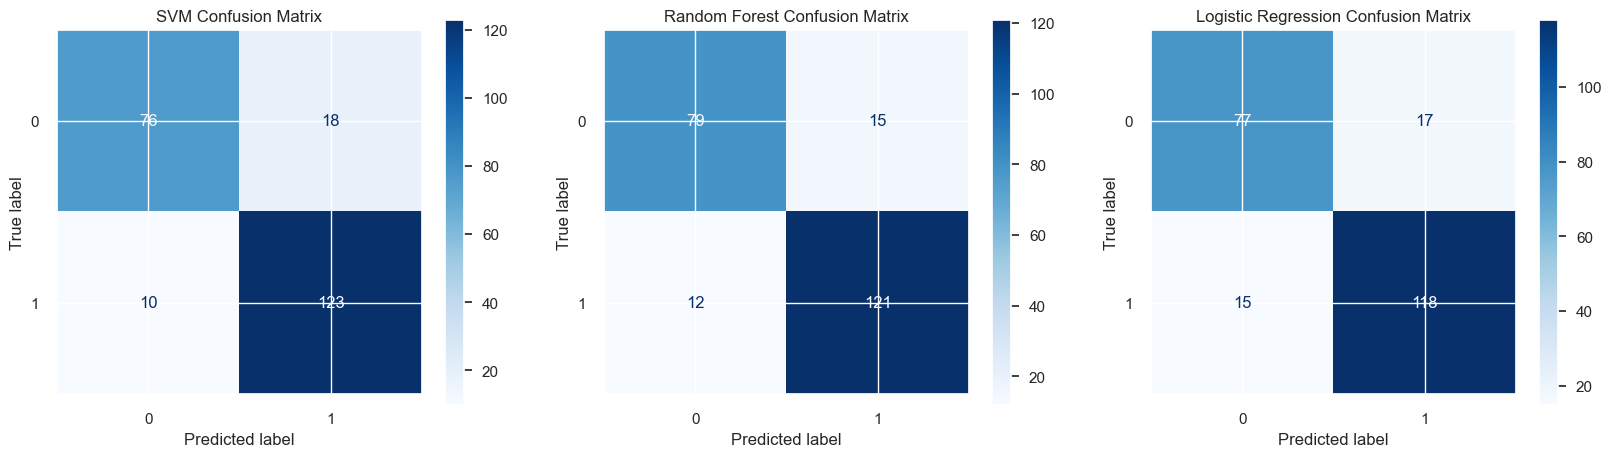

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ConfusionMatrixDisplay.from_estimator(best_model_svm, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("SVM Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(best_model_rf, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(best_model_lr, X_test, y_test, ax=axes[2], cmap='Blues')
axes[2].set_title("Logistic Regression Confusion Matrix")

plt.show()


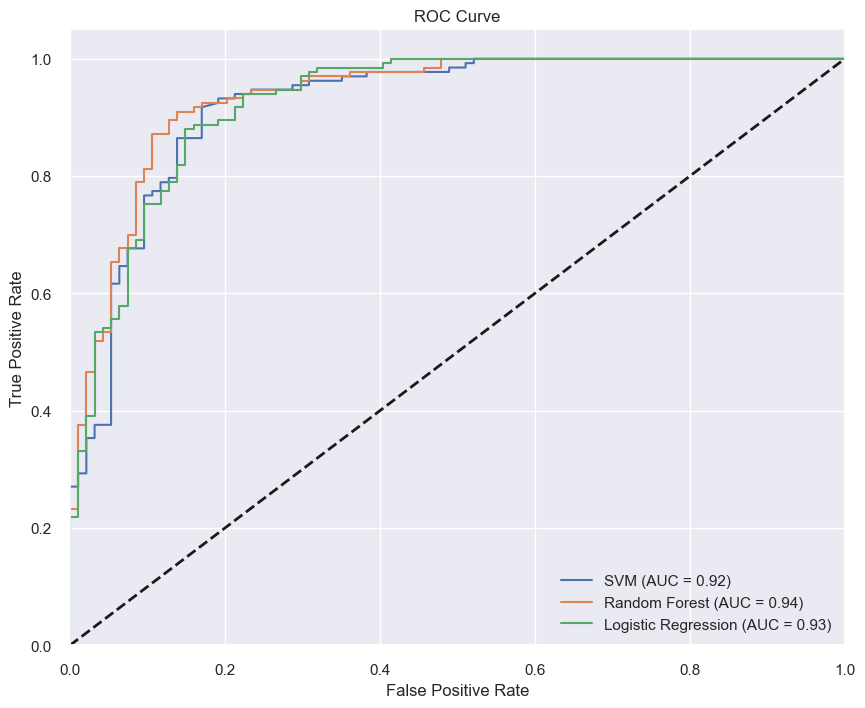

In [48]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

# SVM
y_prob_svm = best_model_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
ax.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Random Forest
y_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Logistic Regression
y_prob_lr = best_model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Plot settings
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc="lower right")

plt.show()


We've successfully performed hyperparameter tuning and evaluated the models. Here are some observations:

Random Forest achieved the highest accuracy among the three models with an accuracy of 88.11%. The best parameters for Random Forest are {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.

SVM and Random Forest both achieved an accuracy of 87.67%. The best parameters for SVM are {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}.

Logistic Regression achieved an accuracy of 85.90%. The best parameters for Logistic Regression are {'C': 0.1, 'solver': 'newton-cg'}.

Looking at the classification reports, all models perform well with high precision, recall, and F1-score for both classes.

Random Forest and SVM models have better recall for class 1, indicating that they are better at identifying positive cases.

Overall, Random Forest seems to be the best-performing model based on accuracy hence we move forward with random forest.

# Hyperparameter Tuning for Random Forest:
 

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest: ", best_params_rf)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on the test set
y_pred_rf = best_rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy:  0.8810572687224669
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        94
           1       0.88      0.92      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227



#  Evaluating the Tuned Model

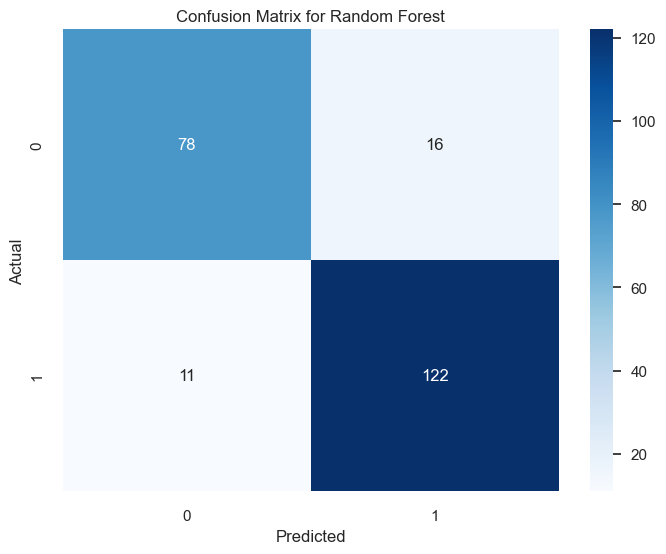

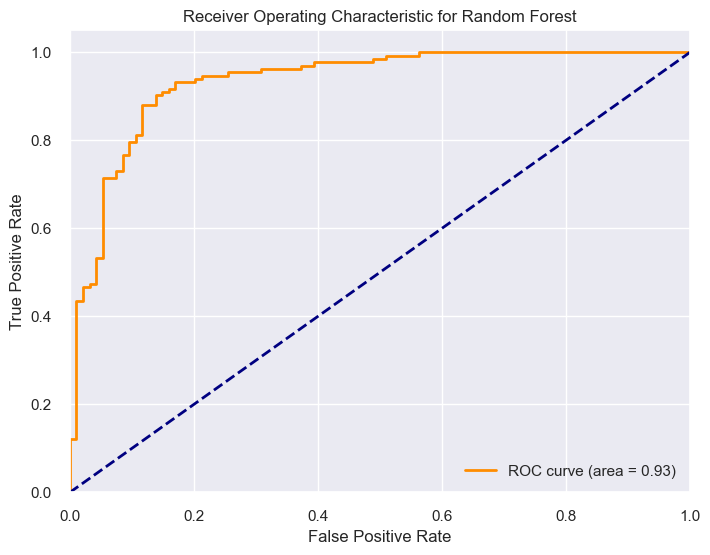

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()


Summary of Model Performance

Before Hyperparameter Tuning:

Random Forest Accuracy: 0.8643 ± 0.0192

After Hyperparameter Tuning:

Random Forest Accuracy: 0.8811

The best parameters found for the Random Forest model were:

max_depth: 10

min_samples_leaf: 1

min_samples_split: 2

n_estimators: 300

# Ensemble Methods:

Ensemble Model Accuracy:  0.8810572687224669
Ensemble Model Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        94
           1       0.88      0.92      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227



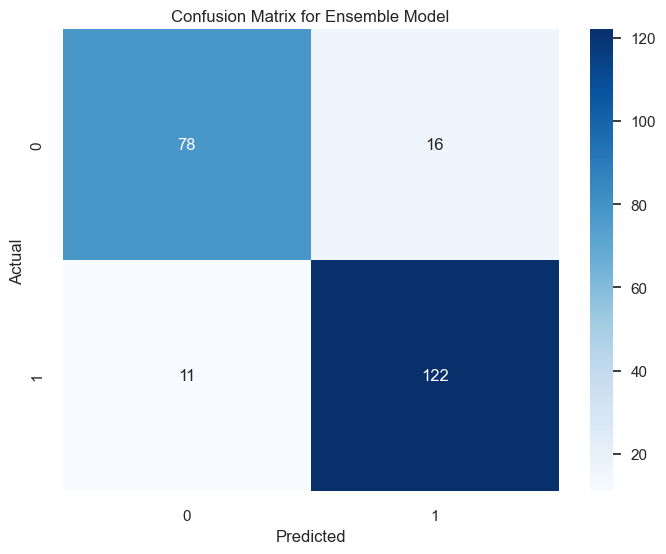

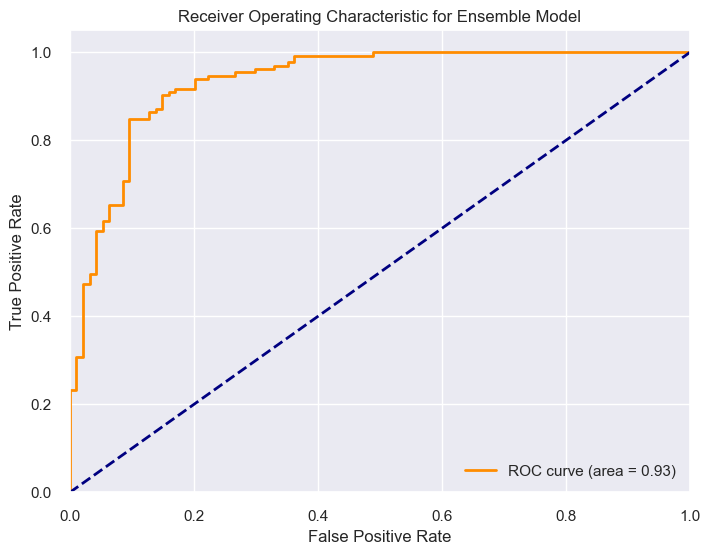

In [51]:
# Voting classifier
from sklearn.ensemble import VotingClassifier

# Instantiate individual models
log_reg = LogisticRegression(C=0.1, solver='newton-cg', random_state=42)
svm = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=42)
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('svc', svm), ('rf', rf)], voting='soft')
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test)
print("Ensemble Model Accuracy: ", accuracy_score(y_test, y_pred_voting))
print("Ensemble Model Classification Report: \n", classification_report(y_test, y_pred_voting))

# Confusion Matrix for Ensemble Model
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Ensemble Model
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_voting)
roc_auc_voting = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Ensemble Model')
plt.legend(loc="lower right")
plt.show()


Bagging Model Accuracy:  0.8810572687224669
Bagging Model Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        94
           1       0.88      0.92      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227



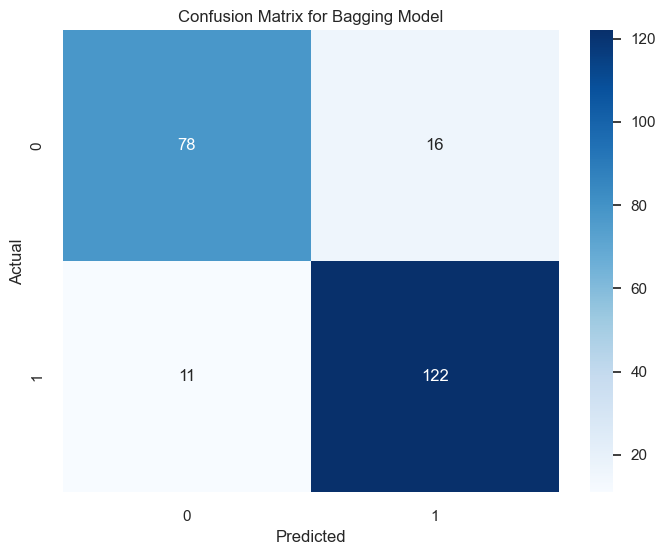

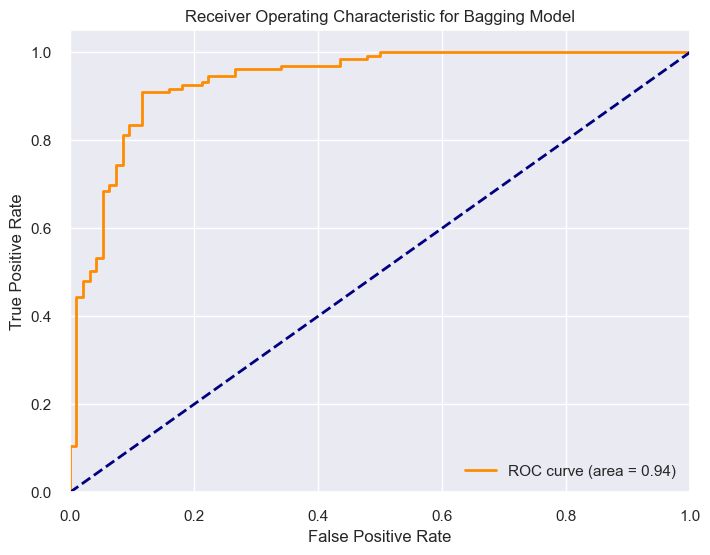

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create a BaggingClassifier with RandomForest
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Evaluate the Bagging model
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Model Accuracy: ", accuracy_score(y_test, y_pred_bagging))
print("Bagging Model Classification Report: \n", classification_report(y_test, y_pred_bagging))

# Confusion Matrix for Bagging Model
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bagging Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Bagging Model
y_prob_bagging = bagging_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bagging)
roc_auc_bagging = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_bagging)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Bagging Model')
plt.legend(loc="lower right")
plt.show()


AdaBoost Model Accuracy:  0.8325991189427313
AdaBoost Model Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.81        94
           1       0.88      0.83      0.85       133

    accuracy                           0.83       227
   macro avg       0.83      0.83      0.83       227
weighted avg       0.84      0.83      0.83       227



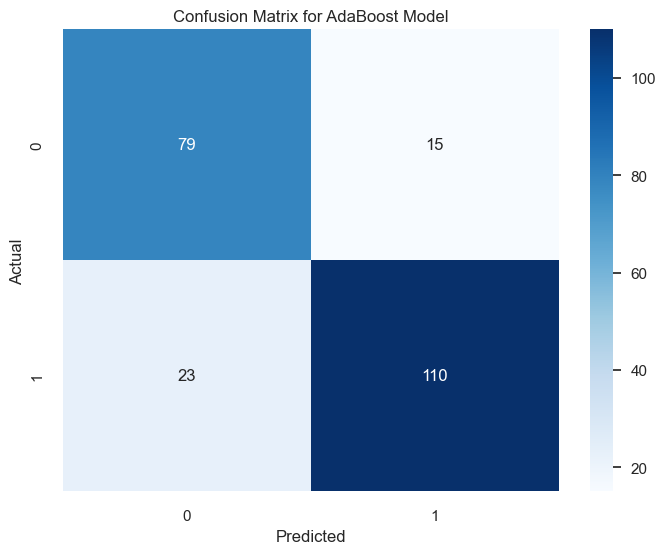

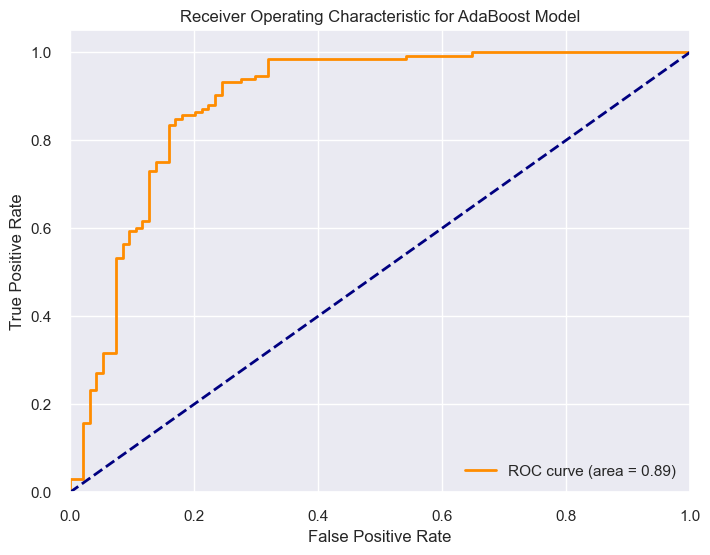

In [53]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

# Evaluate the AdaBoost model
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost Model Accuracy: ", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Model Classification Report: \n", classification_report(y_test, y_pred_ada))

# Confusion Matrix for AdaBoost Model
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for AdaBoost Model
y_prob_ada = ada_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada)
roc_auc_ada = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for AdaBoost Model')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting Model Accuracy:  0.8678414096916299
Gradient Boosting Model Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84        94
           1       0.87      0.91      0.89       133

    accuracy                           0.87       227
   macro avg       0.87      0.86      0.86       227
weighted avg       0.87      0.87      0.87       227



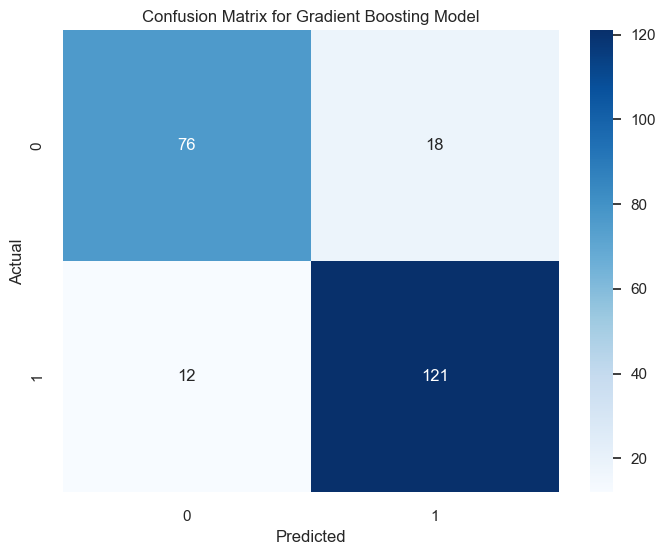

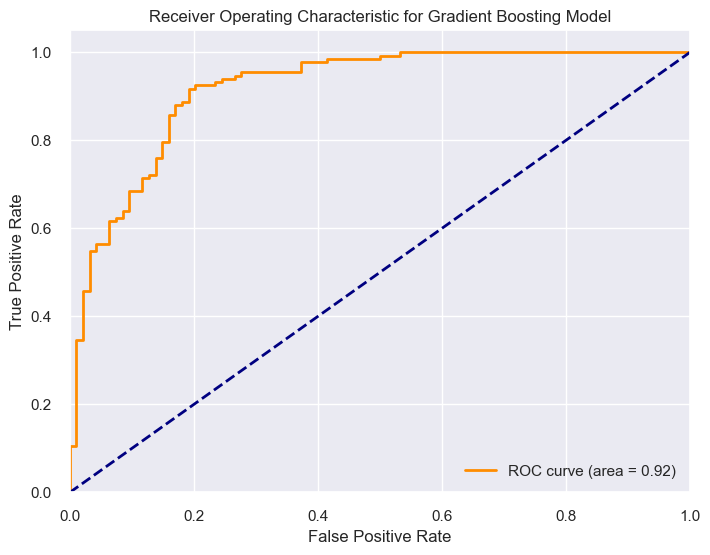

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate the Gradient Boosting model
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Model Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Model Classification Report: \n", classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting Model
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Gradient Boosting Model
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient Boosting Model')
plt.legend(loc="lower right")
plt.show()
